In [5]:
from analyzer import BackTester
from strategies import MACD_Simple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

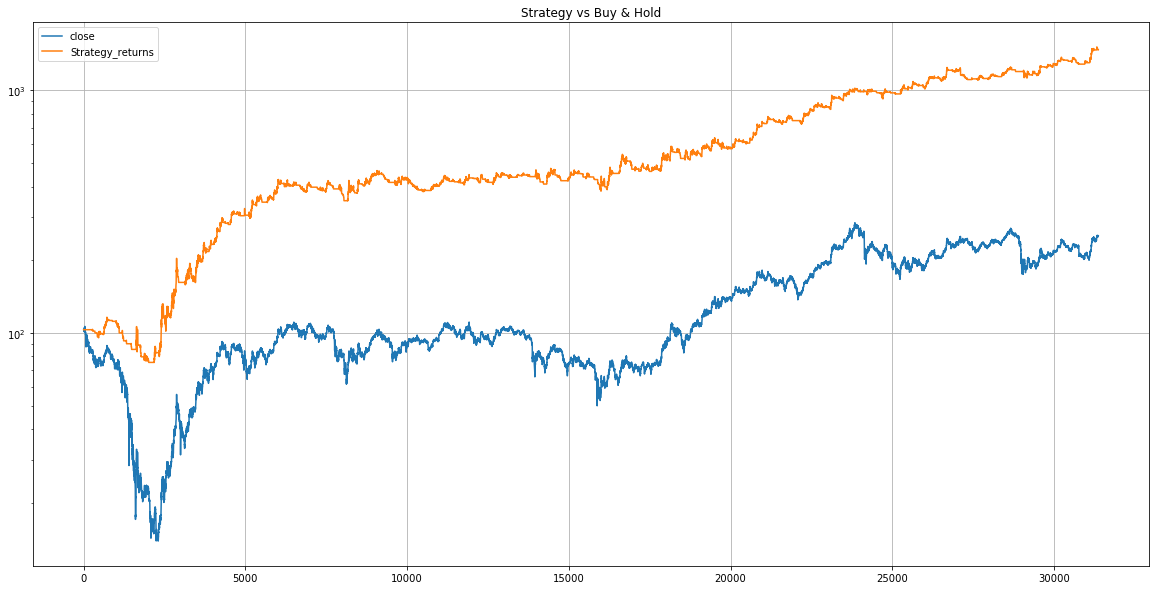

In [55]:
tester = BackTester(take_profit = 10, stop_loss = 3)

# for ticker in pd.read_csv('approved_tickers.csv').tickers.to_list():

stock_data = BackTester.get_frame('SBER', simple = True, time_frame = '1h')
stock_data = MACD_Simple.get_strategy_frame(stock_data)

result = tester.test_strategy(stock_data)
BackTester.visualize(result)

In [57]:
def evaluate_strategy(frame, period = 'Year'):
    #required columns [close, ret]
    #Accepted periods = [Year,Month]
    
    def get_data(df, year = None):
        
        if year is not None:
            df = df[df.time.dt.year == year]
        
        return dict(
            strategy_net_income = df.Strategy_returns.iloc[-1] / df.Strategy_returns.iloc[0] -1,
            asset_net_income = df.close.iloc[-1] / df.close.iloc[0] - 1,
            sharpe_ratio = (df.ret.mean() / df.ret.std())*np.sqrt(len(df)),
            std = df.close.std(),
            max_drop_down = (df.Strategy_returns.min() / df.Strategy_returns.iloc[0]) - 1,
            asset_peak = df.close.max() / df.close.iloc[0] -1,
            asset_min = df.close.min() / df.close.iloc[0] -1
        )
       
    frame = frame.iloc[1:]
    total_result = get_data(df = frame)
    print(total_result)
    year_list = frame.time.dt.year.unique()
    months = [i for i in range(1,13)]
    compare_list = list()
    index = None
    if period == 'Year':
        compare_list = list(map(lambda year:get_data(df = frame, year = year),year_list))
        index = year_list
        
    if period == 'Month':
        for year in year_list:
            month_list = frame[frame.time.dt.year == year].time.dt.month.unique()
            for month in month_list:
                df = frame[(frame.time.dt.year == year) & (frame.time.dt.month == month)]
                compare_list.append(get_data(df))
                
    return pd.DataFrame(compare_list)

temp = evaluate_strategy(result, period = 'Year')
# temp.asset_net_income = temp.asset_net_income.shift(1)
temp

{'strategy_net_income': 13.261530888571864, 'asset_net_income': 1.4593352883675466, 'sharpe_ratio': 1.350485759612563, 'std': 65.09158288040081, 'max_drop_down': -0.26673978312253366, 'asset_peak': 1.7763440860215054, 'asset_min': -0.8644183773216031}


,strategy_net_income,asset_net_income,sharpe_ratio,std,max_drop_down,asset_peak,asset_min
0,-0.255635,-0.777224,-1.256937,24.812118,-0.255635,0.039198,-0.833431
1,2.413505,2.548994,2.222757,20.266287,-0.039367,2.551562,-0.406504
2,0.430950,0.195822,0.847428,9.908732,-0.029155,0.243572,-0.261593
3,-0.001122,-0.234330,-0.535536,11.508394,-0.131760,0.067502,-0.407329
4,-0.002400,0.150248,0.744524,5.096053,-0.052130,0.281064,-0.059282
5,0.105389,0.038067,0.488071,4.775369,0.000000,0.136774,-0.098399
6,-0.122507,-0.451548,-1.347484,9.801458,-0.122507,0.026074,-0.499800
7,0.377693,0.871719,1.982211,12.196077,-0.016555,1.032902,0.000000
8,0.324240,0.715347,2.112037,22.502129,-0.038020,0.774356,-0.181386
9,0.275909,0.298731,1.258324,23.667812,0.000000,0.338178,-0.210842


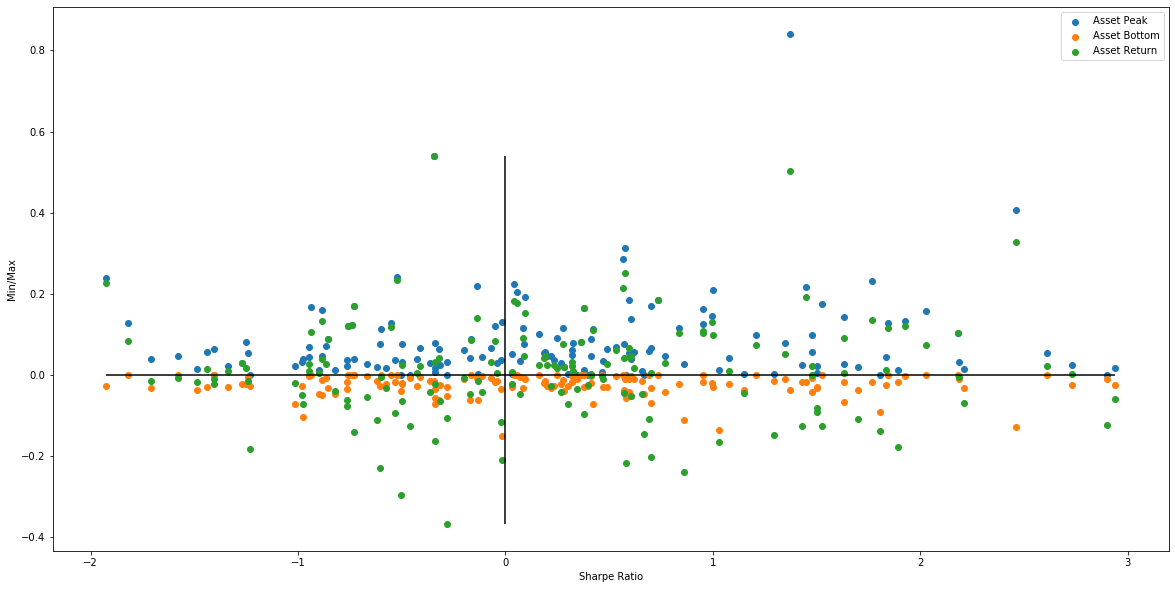

In [52]:
plt.scatter(x = temp.sharpe_ratio, y = temp.asset_peak.shift(1), label = 'Asset Peak')
plt.scatter(x = temp.sharpe_ratio, y = temp.max_drop_down.shift(1),label = 'Asset Bottom')
plt.scatter(x = temp.sharpe_ratio, y = temp.asset_net_income.shift(1),label = 'Asset Return')
# plt.scatter(x = temp.sharpe_ratio, y = temp.strategy_net_income.shift(1),label = 'Strategy Return')

plt.hlines(y = 0,xmin = temp.sharpe_ratio.min(),xmax = temp.sharpe_ratio.max())
plt.vlines(x = 0,ymin = temp.asset_net_income.min(),ymax = temp.asset_net_income.max())
plt.xlabel(xlabel = 'Sharpe Ratio')
plt.ylabel(ylabel = 'Min/Max')

plt.legend()

['SBER',
 'YNDX',
 'GAZP',
 'AFLT',
 'MGNT',
 'MOEX',
 'MTLR',
 'PLZL',
 'ALRS',
 'VTBR',
 'LKOH',
 'MTSS',
 'ROSN',
 'NLMK',
 'CHMF',
 'SNGS',
 'RSTI',
 'AFKS',
 'CBOM',
 'MAGN',
 'TATN',
 'APTK',
 'GMKN',
 'NVTK',
 'SIBN',
 'POLY',
 'RUAL',
 'RTKM',
 'LSRG',
 'TRMK',
 'SBERP',
 'TATNP',
 'SNGSP',
 'IRAO',
 'HYDR',
 'FEES',
 'LNTA']

In [13]:
[i for i in range(1,13)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]